# Algebra Lineal Computacional
## TP2 2C-2023.

### Matias Moran
### Daniela Melian

In [70]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

Ejercicio 1

In [71]:
### a

# obtain the headers
with open('wine.csv', 'r') as file:
    headers = file.readline().split(',')

# read the data from the csv file
data = np.genfromtxt('wine.csv', delimiter=',')

# drop the text headers and keep only the values
data = data[1:]

In [72]:
### b

# get the independant variables
x = data[:, :-1]

# get the single dependant variable
y = data[:, -1]

1.995906561123877e-17
0.9971870549059036


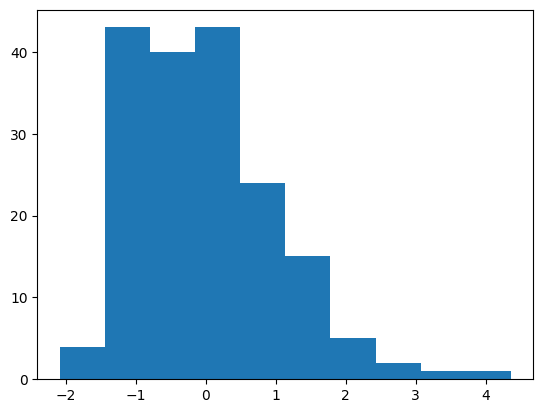

In [73]:
### c

# normalize the data for each column
for col in range(x.shape[1]):

    # calculate the mean
    column_mean = np.mean(x[:, col])
    
    # calculate the standard deviation
    squared_diff = 0
    for row in range(x.shape[0]):
        squared_diff = squared_diff + (x[row, col] - column_mean) ** 2
    column_std = np.sqrt(squared_diff / (x.shape[0] - 1))
    
    # normalize the column
    x[:, col] = (x[:, col] - column_mean) / column_std

# print the mean and std of a random column and see if it is normalized
print(np.mean(x[:, 4]))
print(np.std(x[:, 4]))
plt.hist(x[:,4])
plt.show()

### ¿Por que es importante este paso?

La estandarización de la información es un paso crucial, ya que asegura que todas las columnas estén en la misma escala. Esto resulta fundamental cuando se deben calcular distancias entre vinos, representados como puntos en el espacio. La normalización y centralización evitan que las diferencias de escala entre las diversas propiedades (columnas) afecten los cálculos. De lo contrario, podría ocurrir que una dimensión (o propiedad) influya desproporcionadamente más que otras, simplemente debido a consideraciones numéricas. En resumen, este proceso garantiza una evaluación equitativa de todas las dimensiones del conjunto de datos, siendo esencial para mantener la coherencia y precisión en el análisis. 

In [74]:
### d

# calculate the covariance matrix

rows_qty = x.shape[0]
col_qty = x.shape[1]

cov = np.zeros(shape=(col_qty, col_qty))

for i in range(col_qty):
    for j in range(col_qty):
        i_col_mean = np.mean(x[:, i])
        j_col_mean = np.mean(x[:, j])
        
        for k in range(rows_qty):
            cov[i, j] = cov[i, j] + (x[k, i] - i_col_mean) * (x[k, j] - j_col_mean)
        cov[i, j] = cov[i, j] / rows_qty

### ¿Que representa la matriz de covarianza? ¿Que dimensiones tiene y que propiedades cumple?

La matriz de covarianza nos da información fundamental sobre la relación entre dos o más variables aleatorias. Cada uno de sus elementos refleja la covarianza entre pares de variables, revelando cómo estas variables varían en conjunto.

Esta matriz cuadrada, presenta dimensiones de n x n, donde n representa el número de variables aleatorias. En este caso, la matriz sería de dimensiones 13 x 13, coincidiendo con la cantidad de variables independientes.

La matriz de covarianza es  siempre simétrica y  semidefinida positiva. Esta característica es importante ya que la hace semejante a una matriz diagonal donde las entrada son sus autovalores y estos son reales, lo que nos ayuda en cálculos futuros.

In [75]:
### e

def get_related_eigenvalue(matrix, eigenvector):
    """Obtain the eigenvalue using the Rayleigh quotient.
    :param matrix: numpy.matrix, Matrix with associated eigenvector.
    :param eigenvector: numpy.array, eigenvector associated with the matrix.
    :return: eigenvalue associated with the eigenvector."""
    transposed_eigenvector = np.transpose(eigenvector)
    return transposed_eigenvector @ matrix @ eigenvector / (transposed_eigenvector @ eigenvector)

def get_max_eigenvector_and_eigenvalue(matrix, eigenvector=None, previous_eigenvalue=None):
    """Recursive function that uses the power method to calculate the maximum eigenvector of a matrix.
    :param matrix: numpy.matrix, matrix to which the maximum eigenvector will be calculated.
    :param eigenvector: numpy.array, vector to be used to calculate.
    :param previous_eigenvalue: float, eigenvalue associated with each eigenvector in each iteration.
    :return (eigenvector, eigenvalue): (numpy.array, float), maximum eigenvector and its associated eigenvalue."""
    # start with a random vector
    if eigenvector is None:
        eigenvector = np.random.rand(matrix.shape[1])
    if previous_eigenvalue is None:
        previous_eigenvalue = 0

    # apply the power method multiplying the matrix with the vector and dividing by the norm and stop when its converges
    eigenvector = (matrix @ eigenvector) / np.linalg.norm(matrix @ eigenvector)
    eigenvalue = get_related_eigenvalue(matrix, eigenvector)

    # stop when the eigenvalue converges
    if (eigenvalue - previous_eigenvalue) < 0.00001:
        return eigenvector, eigenvalue
    else:
        return get_max_eigenvector_and_eigenvalue(matrix, eigenvector, eigenvalue)


max_cov_eigenvector, max_cov_eigenvalue = get_max_eigenvector_and_eigenvalue(cov)

# print the results
print(max_cov_eigenvalue)
print(max_cov_eigenvector)

4.679410958520444
[ 0.14478308 -0.24497642 -0.00175443 -0.23933016  0.14227312  0.39472171
  0.42293098 -0.29850595  0.31346624 -0.08811943  0.29645246  0.37601293
  0.28709445]


In [76]:
### f

def get_max_eigenvectors_and_eigenvalues(matrix, quantity):
    """
    Function responsible for finding the eigenvectors and their associated eigenvalues from the power method.
    :param matrix: numpy.matrix, matrix to which all eigenvectors will be calculated.
    :param quantity: int, array rank.
    :return: eigenvectors and eigenvalues associated to the matrix.
    """
    matrix_copy = matrix.copy()
    eigenvectors = np.zeros(shape=(quantity, matrix.shape[1]))
    eigenvalues = np.zeros(quantity)

    # get the maximum eigenvector and eigenvalue and remove it from the matrix
    for i in range(quantity):
        eigenvector, eigenvalue = get_max_eigenvector_and_eigenvalue(matrix_copy)
        eigenvectors[i] = eigenvector
        eigenvalues[i] = eigenvalue
        matrix_copy = matrix_copy - eigenvalue * np.outer(eigenvector, eigenvector)

    return eigenvectors, eigenvalues

eigenvectors, eigenvalues = get_max_eigenvectors_and_eigenvalues(cov, cov.shape[0])

### ¿Como se relaciona la cantidad de autovalores con la cantidad de propiedades de los vinos?
### ¿Que representan cada unos de los autovectores correspondientes?

La cantidad de autovalores es igual a la cantidad de propiedades, ya que la matriz de covarianza tiene dimensiones n x n, correspondientes al número de propiedades. Por ende, presenta n autovalores.

Cada autovector asociado a un autovalor de la matriz de covarianza representa la dirección en el espacio n-dimensional que maximiza la varianza y, por ende, la información contenida.

El autovector relacionado con el primer autovalor señala la dirección de mayor varianza. En consecuencia, el segundo autovector indica la segunda dirección con mayor varianza y es, además, ortogonal a la primera.

Análogamente, el tercer autovector señala la tercera dirección con mayor varianza y es ortogonal a los dos anteriores, y así sucesivamente. Este patrón se mantiene para cada autovalor, lo que proporciona una representación estructurada de las direcciones principales de variabilidad en el conjunto de datos.

In [77]:
### g


class knn_model:
    """KNN model for predicting the result label."""
    def __init__(self, x, y, neighbors):
        self.x = x
        self.y = y
        self.neighbors = neighbors

    def predict(self, input):
        distances = np.zeros(len(self.x))
        results = np.zeros(len(input))

        # calculate the distance between the input and the known data points and return the label of the nearest point
        for i in range(len(input)):
            for j in range(len(self.x)):
                distances[j] = np.linalg.norm(input[i] - self.x[j])
            
            # get the indexes of most similar points and the most frequent label of them
            min_distance_indexes = np.argsort(distances)[:self.neighbors]
            min_distance_values = self.y[min_distance_indexes]
            values, counts = np.unique(min_distance_values, return_counts=True)
            ind = np.argmax(counts)
            results[i] = values[ind]
        
        return results

def predict_data(x, y, input, eigenvectors):
    """Predict the result label of the input array containing the samples attributes and needs the eigenvectors of the covariance matrix."""

    # transform the data into the new basis using the eigenvectors
    transformed_x = x @ np.transpose(eigenvectors)
    
    # create a knn model using the transformed data and the labels
    model = knn_model(transformed_x, y, neighbors=5)

    # predit the result transforming the input data into the new basis and then using the knn model
    return model.predict(input @ np.transpose(eigenvectors))

# take random samples for testing the model
test = x[::10]
correct_labels = y[::10]
predicted_data = predict_data(x, y, test, eigenvectors)

for i in range(len(predicted_data)):
    print("correct value is: " + str(correct_labels[i]) + "    prediction is: " + str(predicted_data[i]))

print("Accuracy: " + str(100 * np.sum(predicted_data == correct_labels) / len(correct_labels)) + "%")

correct value is: 1.0    prediction is: 1.0
correct value is: 1.0    prediction is: 1.0
correct value is: 1.0    prediction is: 1.0
correct value is: 1.0    prediction is: 1.0
correct value is: 1.0    prediction is: 1.0
correct value is: 1.0    prediction is: 1.0
correct value is: 2.0    prediction is: 2.0
correct value is: 2.0    prediction is: 2.0
correct value is: 2.0    prediction is: 2.0
correct value is: 2.0    prediction is: 2.0
correct value is: 2.0    prediction is: 2.0
correct value is: 2.0    prediction is: 2.0
correct value is: 2.0    prediction is: 2.0
correct value is: 3.0    prediction is: 3.0
correct value is: 3.0    prediction is: 3.0
correct value is: 3.0    prediction is: 3.0
correct value is: 3.0    prediction is: 3.0
correct value is: 3.0    prediction is: 3.0
Accuracy: 100.0%


Ejercicio 2

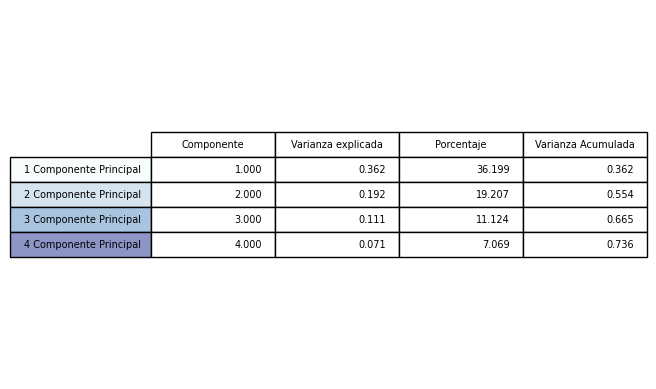

In [78]:
### a

iter = 4
components = []
explain_varianze = []
percent_explain_varianze = []
accumulated_explain_varianze = []

# obtain the data for the table
for i in range(iter):
    components.append(i + 1)
    explain_varianze.append(eigenvalues[i] / np.sum(eigenvalues))
    percent_explain_varianze.append(100 * explain_varianze[i])
    accumulated_explain_varianze.append(np.sum(eigenvalues[0:i + 1]) / np.sum(eigenvalues))

data =  np.transpose(np.array([
            components,
            explain_varianze,
            percent_explain_varianze,
            accumulated_explain_varianze,
        ]))

# plot the table
cell_text = []
for row in data:
    cell_text.append([f'{x:1.3f}' for x in row])

columns = ('Componente', 'Varianza explicada', 'Porcentaje', 'Varianza Acumulada')
rows = ['%d Componente Principal' % x for x in (1,2,3,4)]
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))

the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='center')

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
the_table.scale(1, 1.5)

plt.show()

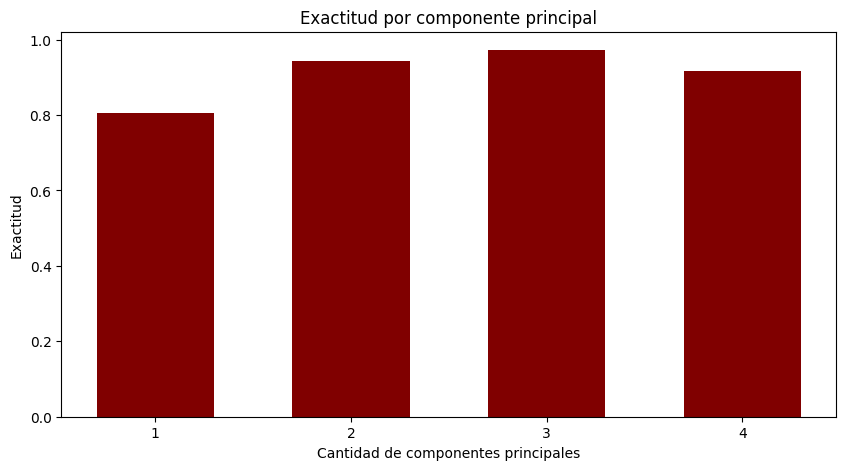

In [79]:
### b

from sklearn.model_selection import train_test_split

def confusion_matrix(y_test, y_pred, labels):
    """Creates the confusion matrix for the given true and predicted labels."""
    confusion_matrix = np.zeros((len(labels), len(labels)))

    for i in range(len(y_test)):
        confusion_matrix[int(y_test[i]) - 1, int(y_pred[i]) - 1] += 1

    return confusion_matrix

def benchmark(x, y, eigenvectors):
    """Return the accuracy and the confusion matrix for the given numbers of eigenvectors."""
    # make a shuffled training and test set
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
    
    # create a knn model using the transformed data and the labels
    knn = knn_model(x_train @ np.transpose(eigenvectors), y_train, neighbors=5)

    # predit the result transforming the test data into the new basis and then using the knn model
    y_pred = knn.predict(x_test @ np.transpose(eigenvectors))
    
    # calculate the accuracy
    accuracy = np.sum(y_pred == y_test) / len(y_test)

    # return accuracy, confusion_matrix(y_test, y_pred, np.unique(y))
    return accuracy, confusion_matrix(y_test, y_pred, labels=np.unique(y))

iter = 4
x_labels = []
y_lables = []
confusion_matrixes = []

# run the benchmark for the first 4 eigenvectors
for i in range(iter):
    accurracy, conf_matrix = benchmark(x, y, eigenvectors[np.arange(0, i + 1), :])
    x_labels.append(f'{i + 1}')
    y_lables.append(accurracy)
    confusion_matrixes.append(conf_matrix)

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x_labels, y_lables, color ='maroon', width = 0.6)
 
plt.xlabel("Cantidad de componentes principales")
plt.ylabel("Exactitud")
plt.title("Exactitud por componente principal")
plt.show()


### De acuerdo a los valores encontrados en la tabla del item anterior, cual de los modelos sugiere utilizar para predecir el segmento al que pertenece un vino. Tener en cuenta que el comercio cuenta con una gran base de datos de clientes y se quiere poder hacer una recomendacion rapidamente.

Como podemos observar en la tabla de arriba, vemos que la exactitud del modelo va mejorando a medida que usamos mas componentes principales, una vez que llegamos a 3 pareceria que el modelo llego a su punto maximo de prediccion.

Con lo cual con 3 dimensiones ya nos alcanza para poder clasificar bien la informacion y agregar mas componentes principales haria que el programa sea mas lento y no estariamos mejorando significativamente la performance, incluso podria llegar a ser peor ya que podriamos estar haciendo lo que se conoce como 'overfitting' o modelando ruido estadistico.

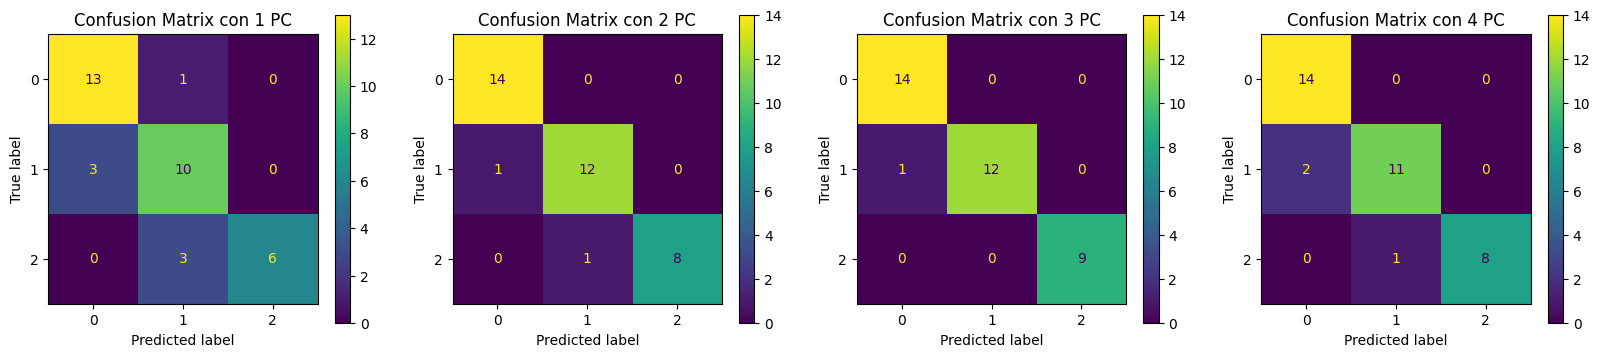

In [80]:
### c

from sklearn.metrics import ConfusionMatrixDisplay

fig, axs = plt.subplots(1, iter, figsize=(20, 4))

for i in range(iter):
    subplot = ConfusionMatrixDisplay(confusion_matrixes[i])
    subplot.plot(ax=axs[i])
    axs[i].set_title(f"Confusion Matrix con {i+1} PC")

plt.show()

### ¿A que conclusiones se puede llegar?

Como podemos observar en las matrices de confusion de arriba, que resumen todos los calculos hechos a lo largo del trabajo practico, vemos que la exactitud del modelo va mejorando a medida que usamos mas componentes principales en nuestro modelo, luego una vez que llegamos a 3 componentes principales podemos concluir que el modelo llego a su punto maximo de prediccion, con lo cual con 3 dimensiones ya nos alcanza para poder clasificar bien la informacion y obtener una buena prediccion para poder recomendar a cada cliente el vino adecuado. Esto destaca la importancia de encontrar un equilibrio entre la complejidad del modelo y su capacidad predictiva. En este caso, la elección de tres dimensiones como base para el modelo parece ser una estrategia eficiente y equilibrada, proporcionando un rendimiento sólido sin caer en la redundancia computacional asociada con dimensiones adicionales.